# COVID-19 vs World-Happiness Data Analysis Notebook
------------------------------------------

### Import Libraries

In [536]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Import the COVID-19 Confirmed Cases Dataset from JHU CSSE repository

In [537]:
corona_dataset_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [538]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484


#### Check the shape of the dataframe

In [539]:
corona_dataset_csv.shape

(271, 335)

### Delete the useless columns

In [540]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378
1,NaN,Albania,0,0,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466
4,NaN,Angola,0,0,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484


### Aggregate rows by Country

In [541]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378
Albania,0,0,0,0,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424
Algeria,0,0,0,0,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933
Andorra,0,0,0,0,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466
Angola,0,0,0,0,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484


#### Check the shape of the new dataframe

In [542]:
corona_dataset_aggregated.shape

(191, 331)

### Find maximum infection rate for all countries. 

In [543]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [544]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,355.0


### Drop the useless columns 

In [545]:
corona_data=pd.DataFrame (corona_dataset_aggregated["max_infection_rate"])

In [546]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


### Import the World Happiness Report dataset

In [547]:
happiness_report_csv = pd.read_csv ("data/worldwide_happiness_report.csv")

In [548]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop the useless columns 

In [549]:
useless_cols= ["Overall rank","Score"]

In [550]:
happiness_report_csv.drop(useless_cols,axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


### Change the indices of the dataframe

In [551]:
happiness_report_csv.set_index("Country or region",inplace = True)

In [552]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,1.383,1.573,0.996,0.592,0.252,0.410
Norway,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


 ### Join COVID-19 Confirmed Cases Dataset and World Happiness Datasets

#### COVID-19 Confirmed Cases Dataset:

In [553]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [554]:
corona_data.shape

(191, 1)

#### World happiness report Dataset :

In [555]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,1.383,1.573,0.996,0.592,0.252,0.410
Norway,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


In [556]:
happiness_report_csv.shape

(156, 6)

### Join Datasets

In [557]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,915.0,0.350,0.517,0.361,0.000,0.158,0.025
Albania,879.0,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1133.0,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,18326.0,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,2476.0,0.850,1.055,0.815,0.283,0.095,0.064


### Generate Correlation matrix 

In [558]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_infection_rate,1.000000,0.116368,0.083433,0.088402,-0.091153,-0.112274,0.004334
GDP per capita,0.116368,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759
Social support,0.083433,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333
Healthy life expectancy,0.088402,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566
Freedom to make life choices,-0.091153,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845
Generosity,-0.112274,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430
Perceptions of corruption,0.004334,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000


### Visualization of the results

In [559]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,915.0,0.350,0.517,0.361,0.000,0.158,0.025
Albania,879.0,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1133.0,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,18326.0,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,2476.0,0.850,1.055,0.815,0.283,0.095,0.064


### Plotting GDP per capita vs maximum infection rate

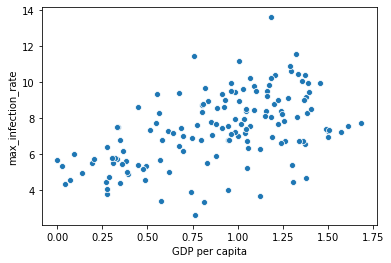

In [560]:
x = data ["GDP per capita"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

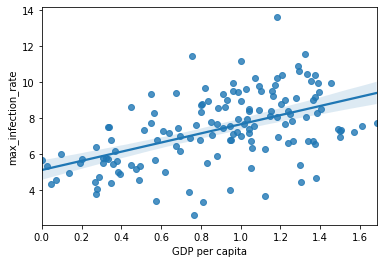

In [561]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/GDPConfirmed.png')

### Plotting Social support vs maximum infection rate

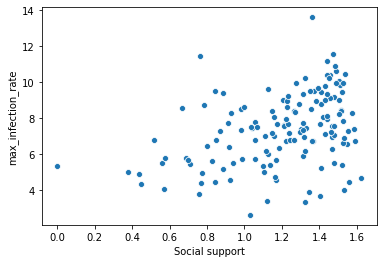

In [562]:
x = data ["Social support"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

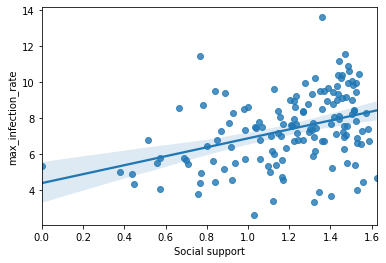

In [563]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/SocialConfirmed.png')

### Plotting Healthy life expectancy vs maximum infection rate

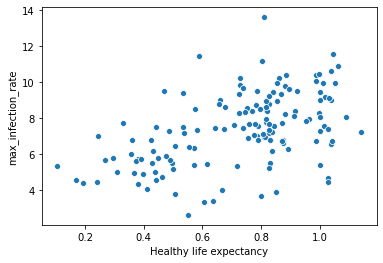

In [564]:
x = data ["Healthy life expectancy"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

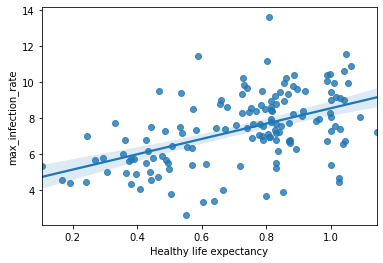

In [565]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/LifeConfirmed.png')

### Plotting Freedom to make life choices vs maximum infection rate

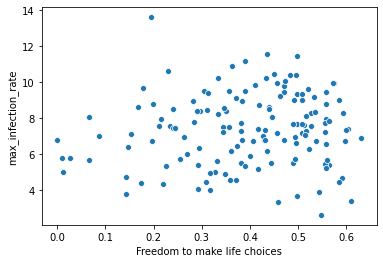

In [566]:
x = data ["Freedom to make life choices"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

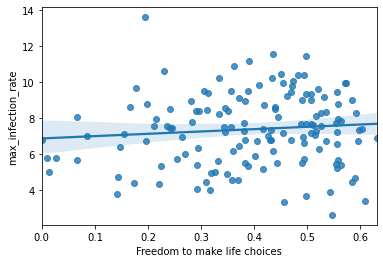

In [567]:
fig = sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/FreedomConfirmed.png')

### Plotting Generosity vs maximum infection rate

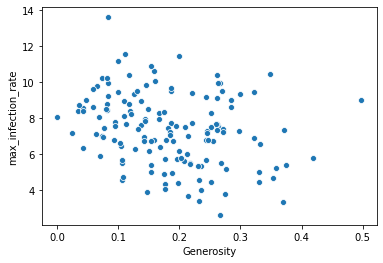

In [568]:
x = data ["Generosity"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

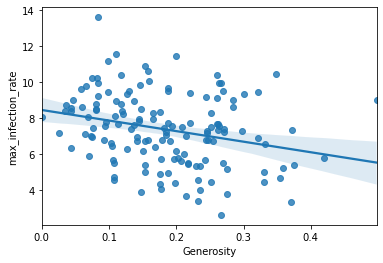

In [569]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/GenerosityConfirmed.png')

### Plotting Perceptions of corruption vs maximum infection rate

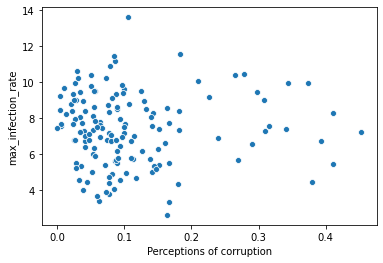

In [570]:
x = data ["Perceptions of corruption"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

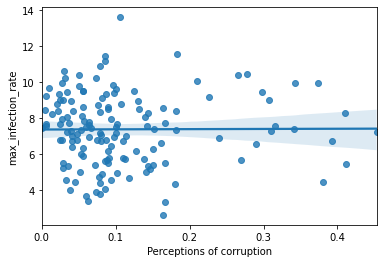

In [571]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/CorruptionConfirmed.png')

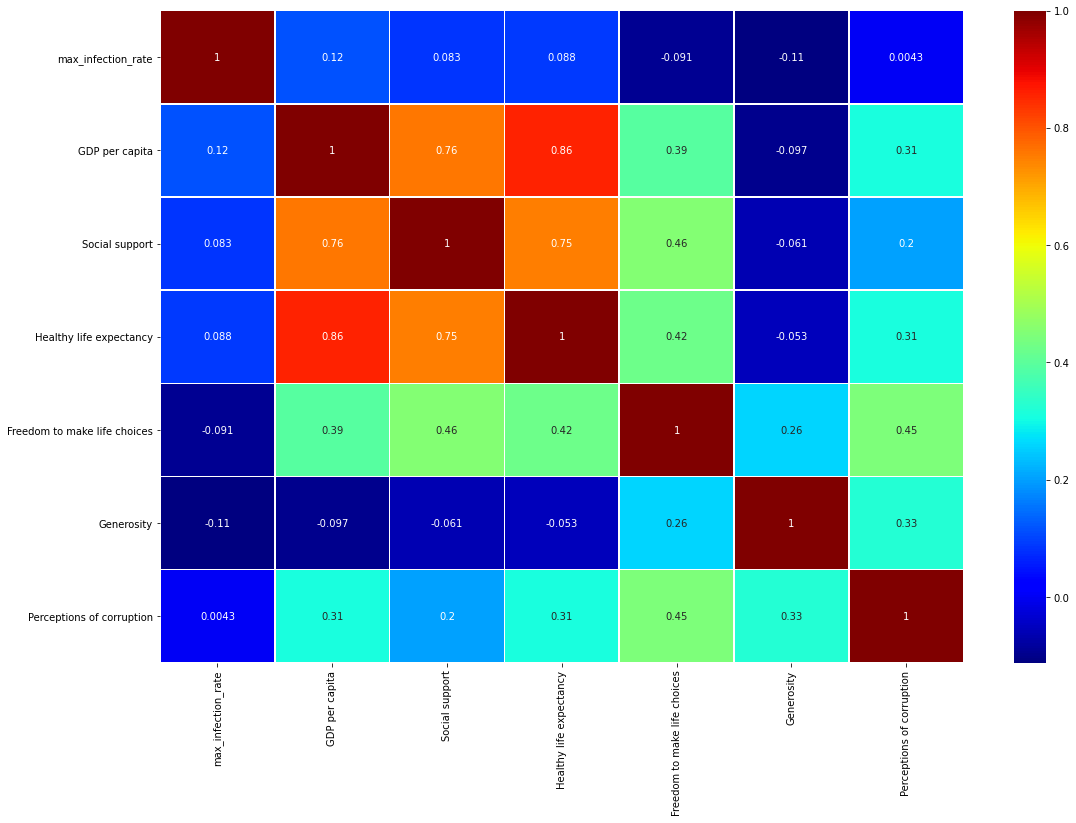

In [572]:
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="jet")
# Saving the Seaborn Figure:
plt.savefig('img/heatmapconfirmed.png')

### Import the COVID-19 Recoveries Cases Dataset

In [573]:
corona_dataset_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [574]:
### Delete the useless columns
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [575]:
### Aggregate rows by Country
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [576]:
### Find maximum recovery rate for all countries
countries = list(corona_dataset_aggregated.index)
max_recovery_rates = []
for c in countries : 
    max_recovery_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_recovery_rates"] = max_recovery_rates

In [577]:
### Drop the useless columns 
corona_data=pd.DataFrame (corona_dataset_aggregated["max_recovery_rates"])

### Import the World Happiness Report dataset

In [578]:
happiness_report_csv = pd.read_csv ("data/worldwide_happiness_report.csv")

In [579]:
useless_cols= ["Overall rank","Score"]

In [580]:
happiness_report_csv.drop(useless_cols,axis=1, inplace=True)

In [581]:
happiness_report_csv.set_index("Country or region",inplace = True)

In [582]:
data = corona_data.join(happiness_report_csv,how="inner")

### Generate Correlation matrix 

In [583]:
data.corr()

,max_recovery_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_recovery_rates,1.000000,0.093277,0.081335,0.065809,-0.090630,-0.144466,-0.027924
GDP per capita,0.093277,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759
Social support,0.081335,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333
Healthy life expectancy,0.065809,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566
Freedom to make life choices,-0.090630,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845
Generosity,-0.144466,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430
Perceptions of corruption,-0.027924,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000


### Visualize the results

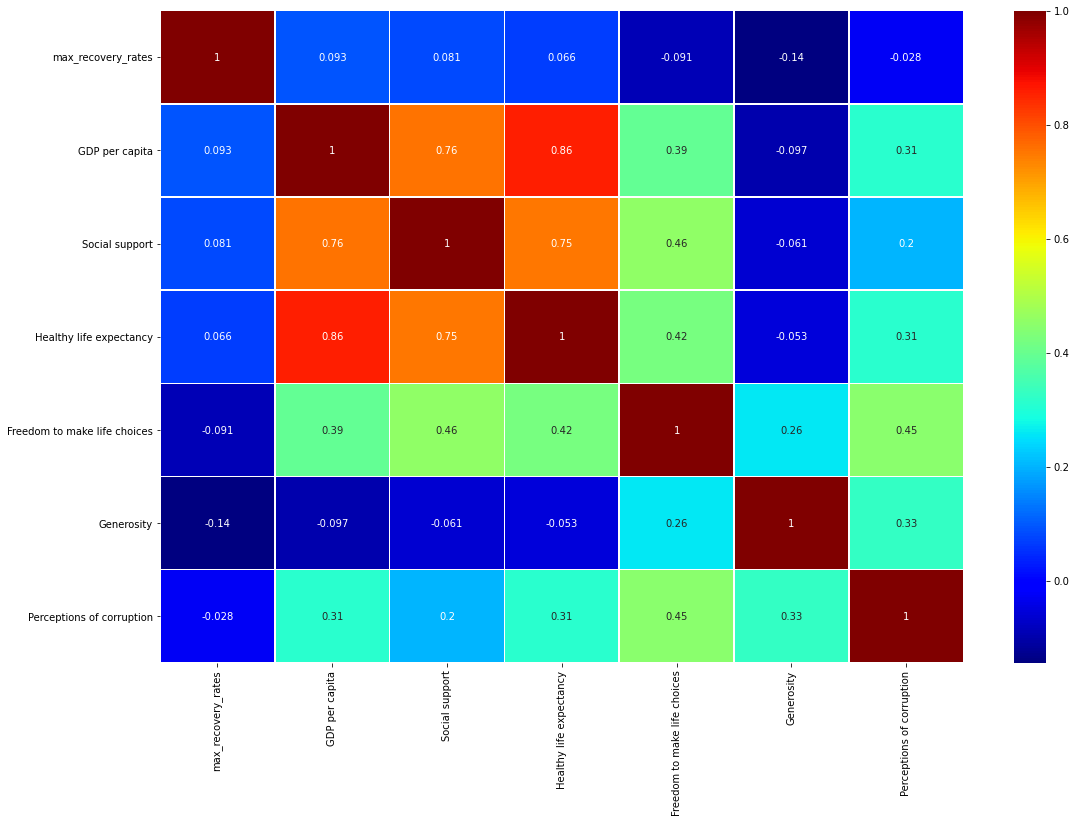

In [584]:
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="jet")
# Saving the Seaborn Figure:
plt.savefig('img/heatmaprecoveries.png')

### Import the COVID-19 Deaths Cases Dataset

In [585]:
corona_dataset_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [586]:
### Delete the useless columns
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [587]:
### Aggregate rows by Country
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [588]:
### Find maximum recovery rate for all countries
countries = list(corona_dataset_aggregated.index)
max_death_rates = []
for c in countries : 
    max_death_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_death_rates"] = max_death_rates

In [589]:
### Drop the useless columns 
corona_data=pd.DataFrame (corona_dataset_aggregated["max_death_rates"])

### Import the World Happiness Report dataset

In [590]:
happiness_report_csv = pd.read_csv ("data/worldwide_happiness_report.csv")

In [591]:
useless_cols= ["Overall rank","Score"]

In [592]:
happiness_report_csv.drop(useless_cols,axis=1, inplace=True)

In [593]:
happiness_report_csv.set_index("Country or region",inplace = True)

In [594]:
data = corona_data.join(happiness_report_csv,how="inner")

### Generate Correlation matrix 

In [595]:
data.corr()

,max_death_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_death_rates,1.000000,0.154235,0.150124,0.212021,0.118066,-0.188672,-0.085317
GDP per capita,0.154235,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759
Social support,0.150124,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333
Healthy life expectancy,0.212021,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566
Freedom to make life choices,0.118066,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845
Generosity,-0.188672,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430
Perceptions of corruption,-0.085317,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000


### Visualization of the results

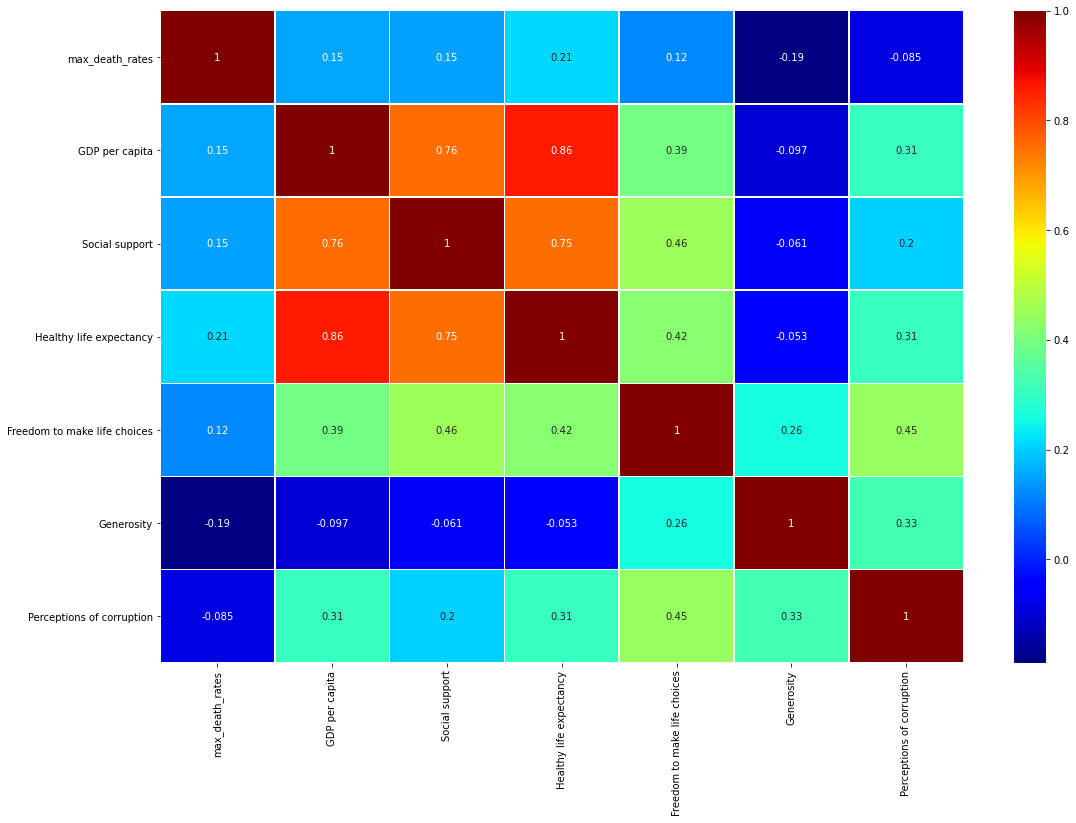

In [596]:
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="jet")
# Saving the Seaborn Figure:
plt.savefig('img/heatmapdeaths.png')